In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sb
sb.set_style('darkgrid')

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,classification_report,accuracy_score

In [3]:
rock=pd.read_csv('C:/Users/siddharth21.TRN/Downloads/rock.csv')
rock

,Unnamed: 0,area,peri,shape,perm
0,1,4990,2791.900,0.090330,6.3
1,2,7002,3892.600,0.148622,6.3
2,3,7558,3930.660,0.183312,6.3
3,4,7352,3869.320,0.117063,6.3
4,5,7943,3948.540,0.122417,17.1
5,6,7979,4010.150,0.167045,17.1
6,7,9333,4345.750,0.189651,17.1
7,8,8209,4344.750,0.164127,17.1
8,9,8393,3682.040,0.203654,119.0
9,10,6425,3098.650,0.162394,119.0


In [4]:
rock.isnull().sum()

Unnamed: 0    0
area          0
peri          0
shape         0
perm          0
dtype: int64

In [5]:
rock.cov()

,Unnamed: 0,area,peri,shape,perm
Unnamed: 0,196.000000,-1.833403e+04,-1.625338e+04,0.636043,4281.531915
area,-18334.031915,7.203045e+06,3.160367e+06,-40.820823,-466063.552128
peri,-16253.384585,3.160367e+06,2.049654e+06,-51.775231,-463032.477146
shape,0.636043,-4.082082e+01,-5.177523e+01,0.006972,20.351635
perm,4281.531915,-4.660636e+05,-4.630325e+05,20.351635,191684.799149


In [6]:
rock.corr()

,Unnamed: 0,area,peri,shape,perm
Unnamed: 0,1.000000,-0.487946,-0.810915,0.544115,0.698518
area,-0.487946,1.000000,0.822506,-0.182161,-0.396637
peri,-0.810915,0.822506,1.000000,-0.433126,-0.738716
shape,0.544115,-0.182161,-0.433126,1.000000,0.556721
perm,0.698518,-0.396637,-0.738716,0.556721,1.000000


In [7]:
from scipy.stats import shapiro

In [8]:
shapiro(rock['area'])

(0.9794373512268066, 0.5554874539375305)

In [9]:
shapiro(rock['peri'])

(0.8925056457519531, 0.00036341050872579217)

In [10]:
shapiro(rock['shape'])

(0.9040692448616028, 0.0008530723862349987)

In [11]:
shapiro(rock['perm'])

(0.8032626509666443, 1.5417334680023487e-06)

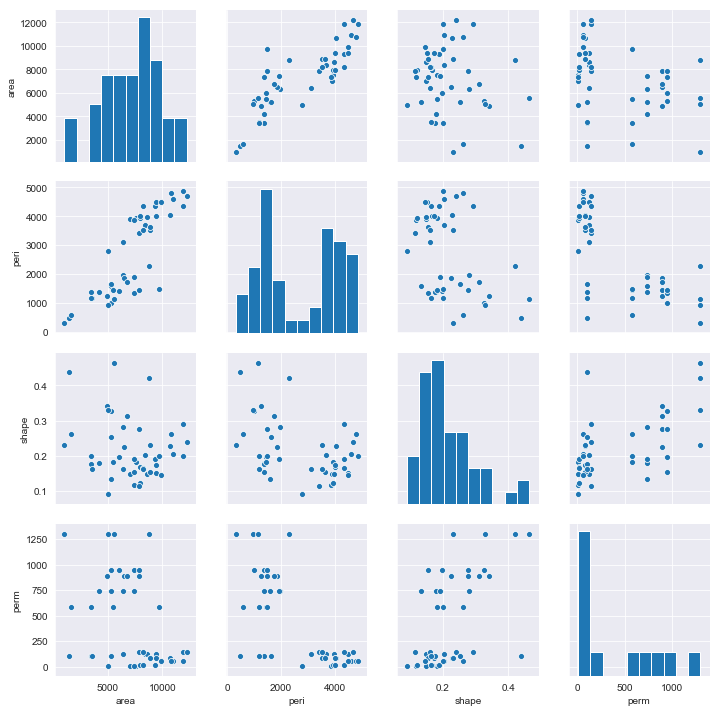

In [12]:
sb.pairplot(rock,vars=['area','peri','shape','perm'])

In [13]:
rock['area'].cov(rock['peri'])

3160367.493301862

In [14]:
rock['area'].corr(rock['peri'])

0.8225064010744685

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


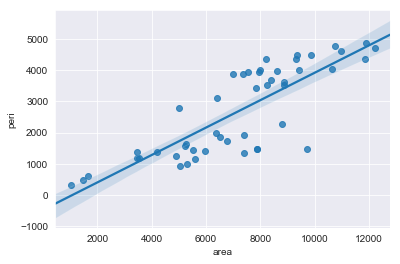

In [15]:
sb.regplot(x='area',y='peri',data=rock)